In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv("../Datasets/raw_data.csv")
df.head()

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


In [5]:
df.columns

Index(['bhk', 'type', 'locality', 'area', 'price', 'price_unit', 'region',
       'status', 'age'],
      dtype='object')

In [6]:
df.shape

(76038, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bhk         76038 non-null  int64  
 1   type        76038 non-null  object 
 2   locality    76038 non-null  object 
 3   area        76038 non-null  int64  
 4   price       76038 non-null  float64
 5   price_unit  76038 non-null  object 
 6   region      76038 non-null  object 
 7   status      76038 non-null  object 
 8   age         76038 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 5.2+ MB


In [8]:
df.isnull().sum()

bhk           0
type          0
locality      0
area          0
price         0
price_unit    0
region        0
status        0
age           0
dtype: int64

In [9]:
df.nunique()

bhk             10
type             5
locality      9782
area          2331
price         4729
price_unit       2
region         228
status           2
age              3
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(20312)

In [11]:
df=df.drop_duplicates()

In [12]:
df.shape

(55726, 9)

In [13]:
print("bhk categories:",df['bhk'].unique())
print("type categories:",df['type'].unique())
print("locality categories:",df['locality'].unique())
print("price_unit categories:",df['price_unit'].unique())
print("region categories:",df['region'].unique())
print("status categories:",df['status'].unique())
print("age categories:",df['age'].unique())

bhk categories: [ 3  2  5  1  4  6  9  8 10  7]
type categories: ['Apartment' 'Villa' 'Studio Apartment' 'Independent House' 'Penthouse']
locality categories: ['Lak And Hanware The Residency Tower' 'Radheya Sai Enclave Building No 2'
 'Romell Serene' ... 'Ahuja Prasadam Phase III' 'HBS Marineview'
 'Hubtown Serene']
price_unit categories: ['Cr' 'L']
region categories: ['Andheri West' 'Naigaon East' 'Borivali West' 'Panvel' 'Mira Road East'
 'Parel' 'Boisar' 'Santacruz East' 'Badlapur East' 'Fort' 'Badlapur West'
 'Khopoli' 'Chembur' 'Jogeshwari West' 'Vasai' 'Kalamboli' 'Powai'
 'Ghansoli' 'Thane West' 'Vikhroli' 'Bhiwandi' 'Airoli' 'Ambernath West'
 'Borivali East' 'Virar' 'Kharghar' 'Ulwe' 'Kamothe' 'Jogeshwari East'
 'Mulund West' 'Palghar' 'Goregaon West' 'Taloja' 'Rasayani'
 'Ghatkopar East' 'Ulhasnagar' 'Dombivali' 'Kewale' 'Nala Sopara'
 'Goregaon East' 'Kandivali East' 'Kurla' 'Andheri East' 'Dahisar'
 'Karanjade' 'Mahim' 'Vashi' 'Malad West' 'Girgaon' 'Dadar West'
 'Bandra Wes

In [14]:
df["bhk"].value_counts()

bhk
2     23609
1     19349
3     10109
4      2165
5       370
6        92
7        13
8         8
10        6
9         5
Name: count, dtype: int64

#### removing 8 9 10 bhk rows as it has very few occurences

In [15]:
threshold=15
bhk_count=df["bhk"].value_counts()
rare_bhk=bhk_count[bhk_count <= threshold].index
df=df.drop(df[df["bhk"].isin(rare_bhk)].index)

In [16]:
df["type"].value_counts()

type
Apartment            54751
Studio Apartment       728
Villa                  153
Independent House       59
Penthouse                3
Name: count, dtype: int64

#### penthouse has only 3 instances out of 750000 records so  we remove them 

In [17]:
df=df.drop(df[df["type"]=="Penthouse"].index)

In [18]:
df["locality"].value_counts()

locality
JP North Barcelona                254
Lodha Codename Premier            207
Amar Vinay Heritage               196
Raj Akshay                        193
JP Codename Dream Home Tower B    192
                                 ... 
Sparsh Shanti Sadan                 1
Vega Platinum Enclave               1
Omkar Puram                         1
Reputed Builder Mhalsa Heights      1
Reputed Builder Humlog housing      1
Name: count, Length: 9776, dtype: int64

In [19]:
df=df.drop("locality",axis=1)

In [20]:
df.head()

,bhk,type,area,price,price_unit,region,status,age
0,3,Apartment,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,659,94.11,L,Mira Road East,Under Construction,New


In [21]:
df["area"].value_counts()

area
650     1386
1050    1148
1100     843
600      808
750      800
        ... 
2288       1
2238       1
2707       1
2004       1
1836       1
Name: count, Length: 2321, dtype: int64

In [22]:
df["price_unit"].value_counts()

price_unit
Cr    28328
L     27363
Name: count, dtype: int64

In [23]:
# combining price_unit and price column by multiplying the Cr unit by 100
df["price_in_lakh"]=df.apply(lambda x:x["price"]*100 if x["price_unit"]=="Cr" else x["price"],axis=1)

In [24]:
df=df.drop(["price","price_unit"],axis=1)

In [25]:
df.head()

,bhk,type,area,region,status,age,price_in_lakh
0,3,Apartment,685,Andheri West,Ready to move,New,250.00
1,2,Apartment,640,Naigaon East,Under Construction,New,52.51
2,2,Apartment,610,Borivali West,Under Construction,New,173.00
3,2,Apartment,876,Panvel,Under Construction,New,59.98
4,2,Apartment,659,Mira Road East,Under Construction,New,94.11


In [26]:
df["region"].value_counts()

region
Mira Road East         7781
Thane West             7312
Dombivali              2332
Kandivali East         1893
Kharghar               1856
                       ... 
Adaigaon                  1
Sector-4 New Panvel       1
Pen                       1
Sector 6 Kamothe          1
L I C Colony              1
Name: count, Length: 228, dtype: int64

#### dataset contains many regions with very few occurrences so dropping rare regions

In [27]:
threshold=25  #min 50 orrurences
region_counts=df["region"].value_counts()

rare_regions=region_counts[region_counts <= threshold].index
# print(rare_regions)
df=df.drop(df[df["region"].isin(rare_regions)].index)

In [28]:
df["region"].value_counts()

region
Mira Road East    7781
Thane West        7312
Dombivali         2332
Kandivali East    1893
Kharghar          1856
                  ... 
Marine Lines        37
Ulhasnagar          35
Belapur             33
Diva                28
Colaba              26
Name: count, Length: 97, dtype: int64

In [29]:
df["status"].value_counts()

status
Ready to move         32384
Under Construction    22768
Name: count, dtype: int64

In [30]:
df["age"].value_counts()

age
New        27449
Resale     19295
Unknown     8408
Name: count, dtype: int64

#### creating price per square feet column

In [31]:
# df["price_per_sq_feet"]=(df["price_in_lakh"]*100000 )/df["area"]

In [32]:
df.head()

,bhk,type,area,region,status,age,price_in_lakh
0,3,Apartment,685,Andheri West,Ready to move,New,250.00
1,2,Apartment,640,Naigaon East,Under Construction,New,52.51
2,2,Apartment,610,Borivali West,Under Construction,New,173.00
3,2,Apartment,876,Panvel,Under Construction,New,59.98
4,2,Apartment,659,Mira Road East,Under Construction,New,94.11


In [33]:
df.shape

(55152, 7)

#### visualising the data

C:\Users\Arsh Ansari\AppData\Local\Temp\ipykernel_17704\816563388.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["type"],y=df["price_in_lakh"],palette="viridis",errorbar=None)


<Axes: xlabel='type', ylabel='price_in_lakh'>

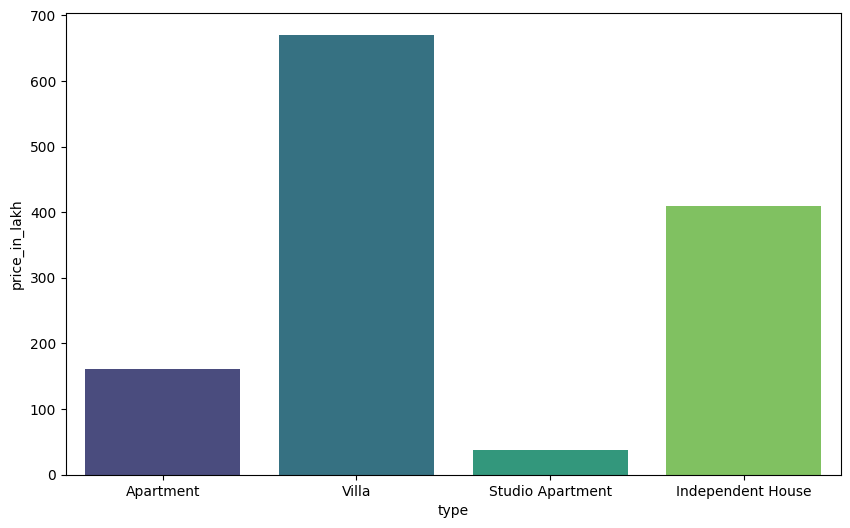

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["type"],y=df["price_in_lakh"],palette="viridis",errorbar=None)

C:\Users\Arsh Ansari\AppData\Local\Temp\ipykernel_17704\1723470446.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["age"],y=df["price_in_lakh"],errorbar=None,palette="viridis")
C:\Users\Arsh Ansari\AppData\Local\Temp\ipykernel_17704\1723470446.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["status"],y=df["price_in_lakh"],errorbar=None,palette="viridis")


<Axes: xlabel='status', ylabel='price_in_lakh'>

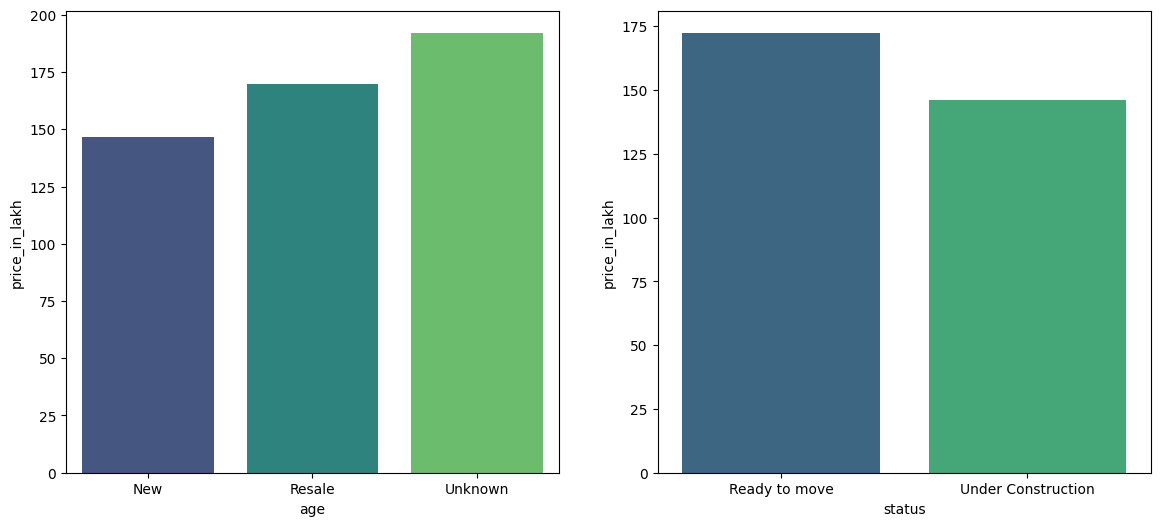

In [35]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.barplot(x=df["age"],y=df["price_in_lakh"],errorbar=None,palette="viridis")
plt.subplot(122)
sns.barplot(x=df["status"],y=df["price_in_lakh"],errorbar=None,palette="viridis")

In [36]:
df.to_csv("../Datasets/cleaned_data.csv",index=False)

In [37]:
df.columns

Index(['bhk', 'type', 'area', 'region', 'status', 'age', 'price_in_lakh'], dtype='object')